In [8]:
!pip install statsmodels --upgrade

ADF Statistic: -5.321087730317715
p-value: 4.950960682090332e-06


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


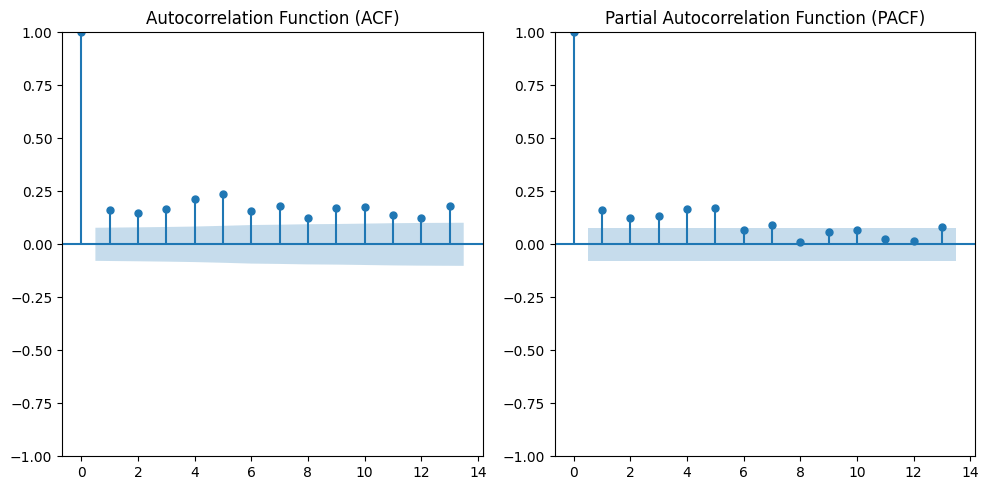

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Mean Squared Error: 11.175587032635937


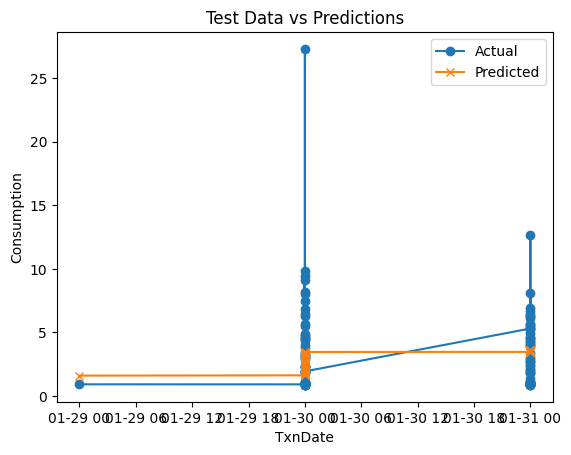

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# 1. Read the CSV file into a DataFrame
df = pd.read_csv('/content/KwhConsumptionBlower78_2.csv')  # Replace 'your_data.csv' with your actual file path
df.head()
# 2. Perform Augmented Dickey-Fuller test
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
df.set_index('TxnDate', inplace=True)
result = adfuller(df['Consumption'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# 3. Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Consumption'][:train_size], df['Consumption'][train_size:]

# 4. Fit AutoRegressive model with 13 lags and plot PACF & ACF
model = AutoReg(train, lags=13)
model_fit = model.fit()

plt.figure(figsize=(10,5))
plt.subplot(121)
plot_acf(df['Consumption'], lags=13, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.subplot(122)
plot_pacf(df['Consumption'], lags=13, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

# 5. Make predictions using the AR model
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# 6. Calculate Mean Squared Error (MSE) and plot results
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, predictions, label='Predicted', marker='x')
plt.title('Test Data vs Predictions')
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.legend()
plt.show()

<ipython-input-15-c1a4e339dd28>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['TxnDate'])
